Generate a model in Python to represent a Housing loan scheme and create a chart to
display the Emi based on rate of interest and reducing balance for a given period. If a customer
wishes to close the loan earlier, print the interest lost distributed over the remaining no. Of
months. Assume suitable data and inputs as necessary.


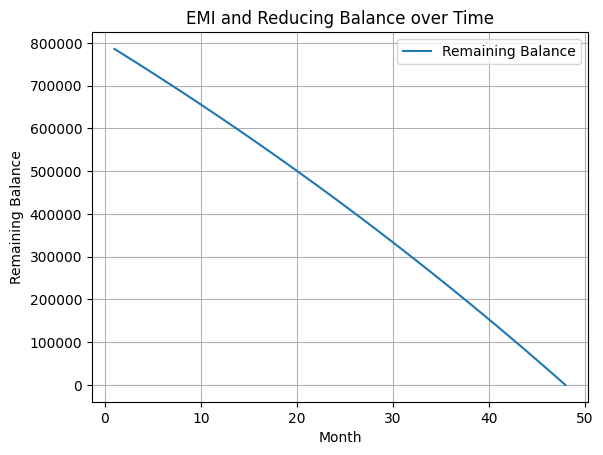

Interest lost if closed early after 24 months: 42022.95


In [3]:
import matplotlib.pyplot as plt

def calculate_emi(principal, annual_rate, tenure_months):
    monthly_rate = annual_rate / 12 / 100
    emi = principal * monthly_rate * (1 + monthly_rate) ** tenure_months / ((1 + monthly_rate) ** tenure_months - 1)
    return emi

def calculate_reducing_balance_emi(principal, annual_rate, tenure_months):
    monthly_rate = annual_rate / 12 / 100
    balance = principal
    emi = calculate_emi(principal, annual_rate, tenure_months)
    
    payments = []
    for month in range(1, tenure_months + 1):
        interest = balance * monthly_rate
        principal_paid = emi - interest
        balance -= principal_paid
        balance = max(0, balance)  
        payments.append((emi, balance, interest, principal_paid))
    
    return payments

def plot_emi_chart(payments, tenure_months):
    months = list(range(1, tenure_months + 1))
    balances = [payment[1] for payment in payments]
    plt.plot(months, balances, label="Remaining Balance")
    plt.xlabel("Month")
    plt.ylabel("Remaining Balance")
    plt.title("EMI and Reducing Balance over Time")
    plt.legend()
    plt.grid(True)
    plt.show()

principal = float(input("Enter loan principal amount: "))
annual_rate = float(input("Enter annual interest rate (in %): "))
tenure_months = int(input("Enter loan tenure in months: "))

payments = calculate_reducing_balance_emi(principal, annual_rate, tenure_months)
plot_emi_chart(payments, tenure_months)

def early_closure_interest_loss(payments, close_after_months):
    interest_paid = sum([payment[2] for payment in payments[:close_after_months]])
    total_interest_if_full = sum([payment[2] for payment in payments])
    interest_loss = total_interest_if_full - interest_paid
    return interest_loss

close_after_months = int(input(f"Enter the month after which you plan to close the loan early (1-{tenure_months}): "))

if close_after_months <= tenure_months:
    interest_loss = early_closure_interest_loss(payments, close_after_months)
    print(f"Interest lost if closed early after {close_after_months} months: {interest_loss:.2f}")
else:
    print(f"Invalid input. The month should be within the tenure of {tenure_months} months.")
